In [7]:
from NN import * 
from preprocess import *

In [12]:
def plot(train_loss,val_loss,train_eval,val_eval):
    import matplotlib.pyplot as plt
    import pandas as pd 
    epochs = range(1, len(train_loss) + 1)

    # loss graph
    plt.plot(epochs, train_loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'y-', label='Validation Loss')

    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

    train_eval = pd.DataFrame(train_eval)
    val_eval = pd.DataFrame(val_eval)
    # accuracy graph
    plt.plot(epochs, list(train_eval["Accuracy"]), 'b-', label='Training Accuracy')
    plt.plot(epochs, list(val_eval["Accuracy"]), 'y-', label='Validation Accuracy')

    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    # macro f1 graph 
    plt.plot(epochs, list(train_eval["Macro_F1"]), 'b-', label='Training Macro F1')
    plt.plot(epochs, list(val_eval["Macro_F1"]), 'y-', label='Validation Macro F1')

    plt.title('Training and Validation Macro F1')
    plt.xlabel('Epochs')
    plt.ylabel('Macro F1')
    plt.legend()

    plt.show()
    

In [13]:
def eval(model,X,y,batch_size=1024,plot_cm=False):
    num_batches = (len(X)+batch_size-1)//batch_size

    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
    import numpy as np


    y_true = y.T.argmax(axis=0)
    y_pred = np.concatenate([model(X[i*batch_size:(i+1)*batch_size].T).argmax(axis=0) for i in range(num_batches)])

    macro_f1 = f1_score(y_true, y_pred, average='macro')
    accuracy = accuracy_score(y_true, y_pred)

    # print(f'Macro F1 Score: {macro_f1}')
    # print(f'Accuracy: {accuracy}')
    if plot_cm:
        from sklearn.metrics import confusion_matrix
        import matplotlib.pyplot as plt
        import seaborn as sns

        cm = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 27), yticklabels=range(1, 27))
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

    return {"Accuracy":accuracy,"Macro_F1":macro_f1} 

def best_model_comparator(model1,model1_eval,model2,model2_eval):
    if model2 is None or model2_eval is None:
        return model1,model1_eval  
    if model1 is None or model1_eval is None:
        return model2,model2_eval
    
    if model1_eval["Macro_F1"] > model2_eval["Macro_F1"]:
        return model1,model1_eval 
    return model2,model2_eval 

In [4]:
X_train,y_train,X_test,y_test=preprocess_EMNIST() 

In [10]:
model = NN(Linear(28*28,1024),ReLU(),Dropout(0.3),Linear(1024,26),Softmax())
model

Linear(784,1024)
ReLU
Dropout(30.0%)
Linear(1024,26)
Softmax

In [11]:
train_loss,val_loss,train_eval,val_eval = model.train(loss=cross_entropy, 
                                                      loss_grad=cross_entropy_grad, 
                                                      X=X_train, y=y_train, 
                                                      epochs=50, 
                                                      batch_size=1024, 
                                                      learning_rate=5e-3,
                                                      eval_function=eval,
                                                      best_model_comparator=best_model_comparator,  
                                                      load_best_model_at_end=True,
                                                      save_best_model_at_each_epoch=True) # learning_rate_scheduler=lambda epoch,i_lr:i_lr)

[WinError 2] The system cannot find the file specified: 'model_Linear(784,1024)_ReLU_Dropout(30.0%)_Linear(1024,26)_Softmax_.pkl'
epoch=0, train_loss[epoch]=0.03719055123580423, val_loss[epoch]=0.2692592247263005, train_eval[epoch]={'Accuracy': 0.8576923076923076, 'Macro_F1': 0.8574079820846993}, val_eval[epoch]={'Accuracy': 0.8395833333333333, 'Macro_F1': 0.8389490699610711}
epoch=1, train_loss[epoch]=0.02372064267680407, val_loss[epoch]=0.24007291583786627, train_eval[epoch]={'Accuracy': 0.875933257918552, 'Macro_F1': 0.875377468946685}, val_eval[epoch]={'Accuracy': 0.8526175213675213, 'Macro_F1': 0.8514053374174206}
epoch=2, train_loss[epoch]=0.021763302405636367, val_loss[epoch]=0.21840307169395584, train_eval[epoch]={'Accuracy': 0.8897341628959275, 'Macro_F1': 0.8893961381696036}, val_eval[epoch]={'Accuracy': 0.8610042735042736, 'Macro_F1': 0.8602591625342223}
epoch=3, train_loss[epoch]=0.020241681371488747, val_loss[epoch]=0.2159339715276001, train_eval[epoch]={'Accuracy': 0.8932

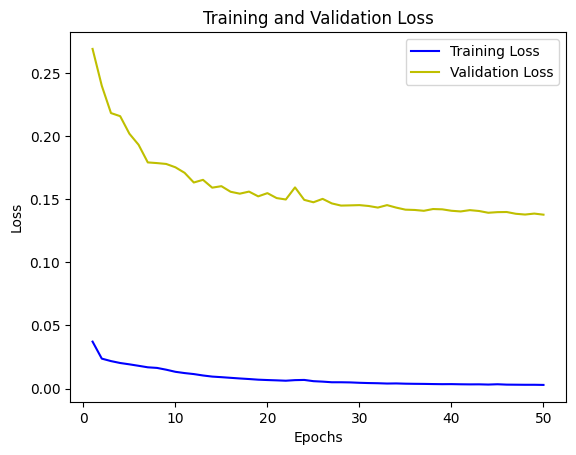

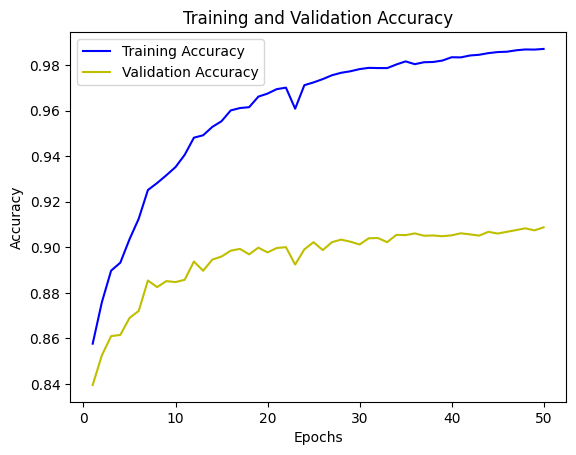

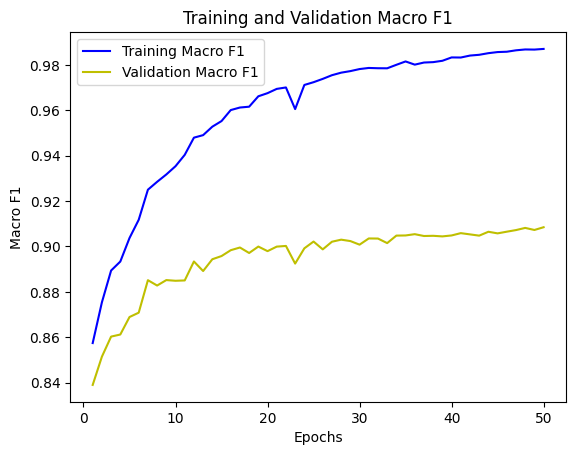

In [14]:
plot(train_loss,val_loss,train_eval,val_eval)

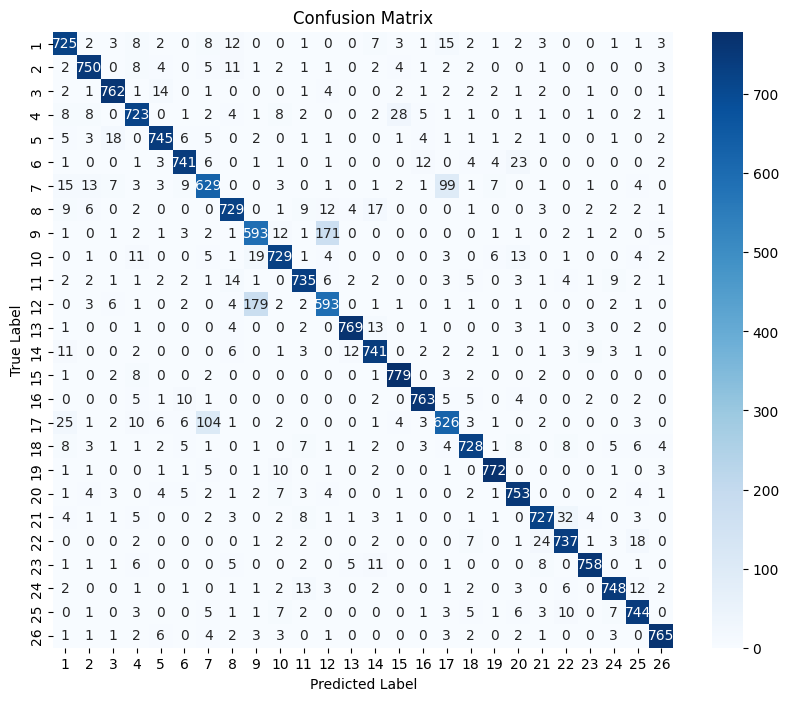

{'Accuracy': 0.9069230769230769, 'Macro_F1': 0.9068942754495564}

In [16]:
eval(model,X_test,y_test,batch_size=2048,plot_cm=True)

In [17]:
model2 = NN(Linear(28*28,1024,initializer="xavier"),Sigmoid(),Dropout(.3),Linear(1024,26),Softmax())
model2

Linear(784,1024)
Sigmoid
Dropout(30.0%)
Linear(1024,26)
Softmax

[WinError 2] The system cannot find the file specified: 'model_Linear(784,1024)_Sigmoid_Dropout(30.0%)_Linear(1024,26)_Softmax_.pkl'
epoch=0, train_loss[epoch]=0.040889756377689615, val_loss[epoch]=0.41797860928599234, train_eval[epoch]={'Accuracy': 0.8124151583710407, 'Macro_F1': 0.8120095676137714}, val_eval[epoch]={'Accuracy': 0.7998931623931624, 'Macro_F1': 0.7992753674034632}
epoch=1, train_loss[epoch]=0.02477792761336504, val_loss[epoch]=0.3231711203002729, train_eval[epoch]={'Accuracy': 0.8637443438914028, 'Macro_F1': 0.8635388472806176}, val_eval[epoch]={'Accuracy': 0.8435897435897436, 'Macro_F1': 0.8430825013012286}
epoch=2, train_loss[epoch]=0.01997603796235054, val_loss[epoch]=0.2773585968835116, train_eval[epoch]={'Accuracy': 0.8893288084464555, 'Macro_F1': 0.8891090306388154}, val_eval[epoch]={'Accuracy': 0.8629807692307693, 'Macro_F1': 0.8624479181918053}
epoch=3, train_loss[epoch]=0.016987353646566852, val_loss[epoch]=0.25033287119254816, train_eval[epoch]={'Accuracy': 0

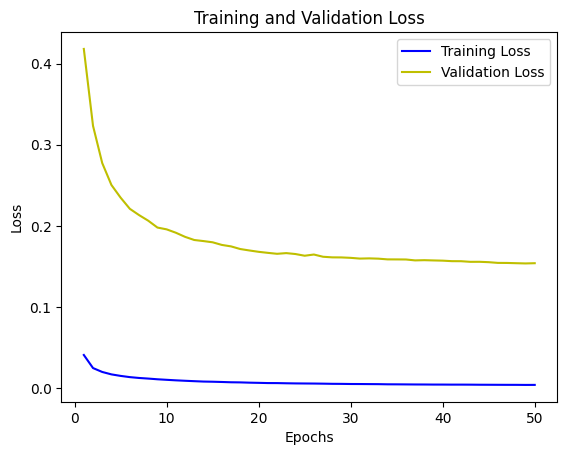

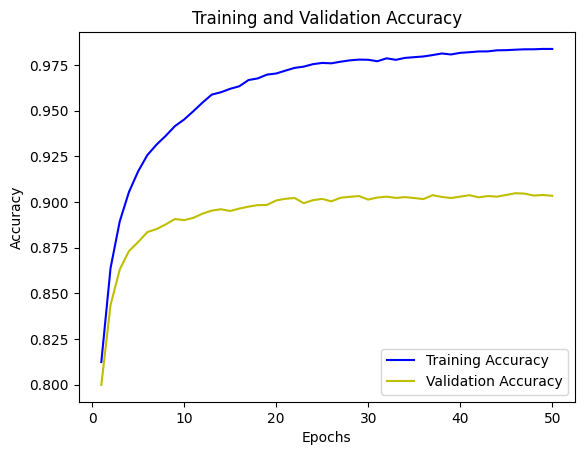

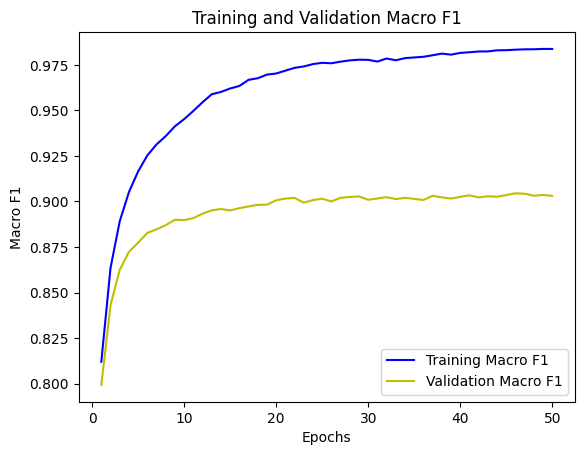

In [18]:
train_loss,val_loss,train_eval,val_eval = model2.train(loss=cross_entropy, 
                                                      loss_grad=cross_entropy_grad, 
                                                      X=X_train, y=y_train, 
                                                      epochs=50, 
                                                      batch_size=1024, 
                                                      learning_rate=5e-3,
                                                      eval_function=eval,
                                                      best_model_comparator=best_model_comparator,  
                                                      load_best_model_at_end=True,
                                                      save_best_model_at_each_epoch=True) 
plot(train_loss,val_loss,train_eval,val_eval)

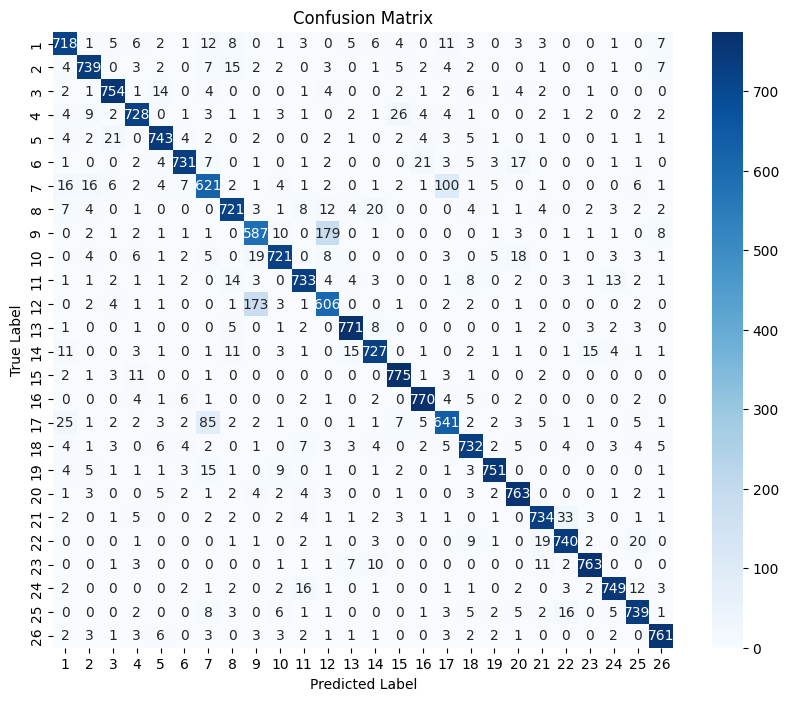

{'Accuracy': 0.9047115384615385, 'Macro_F1': 0.9047785832356403}

In [19]:
eval(model2,X_test,y_test,batch_size=4096,plot_cm=True)

In [20]:
model3 = NN(Linear(28*28,512),ReLU(),Dropout(.2),Linear(512,512),ReLU(),Dropout(0.1),Linear(512,26),Softmax())
model3

Linear(784,512)
ReLU
Dropout(20.0%)
Linear(512,512)
ReLU
Dropout(10.0%)
Linear(512,26)
Softmax

[WinError 2] The system cannot find the file specified: 'model_Linear(784,512)_ReLU_Dropout(20.0%)_Linear(512,512)_ReLU_Dropout(10.0%)_Linear(512,26)_Softmax_.pkl'
epoch=0, train_loss[epoch]=0.030450353775317622, val_loss[epoch]=0.2693235491305715, train_eval[epoch]={'Accuracy': 0.8747926093514329, 'Macro_F1': 0.8741800304448534}, val_eval[epoch]={'Accuracy': 0.8610042735042736, 'Macro_F1': 0.8597996008729463}
epoch=1, train_loss[epoch]=0.017427964072925333, val_loss[epoch]=0.22605951043320927, train_eval[epoch]={'Accuracy': 0.8978883861236803, 'Macro_F1': 0.8974297704546073}, val_eval[epoch]={'Accuracy': 0.8751602564102564, 'Macro_F1': 0.8743632541822944}
epoch=2, train_loss[epoch]=0.01512546358956761, val_loss[epoch]=0.2074155687070418, train_eval[epoch]={'Accuracy': 0.9109822775263952, 'Macro_F1': 0.9107595527225393}, val_eval[epoch]={'Accuracy': 0.8859508547008547, 'Macro_F1': 0.8854562169722924}
epoch=3, train_loss[epoch]=0.013750519304793015, val_loss[epoch]=0.19160843274583614, 

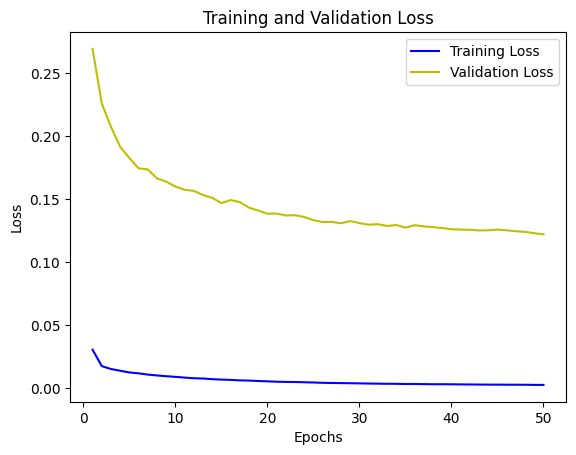

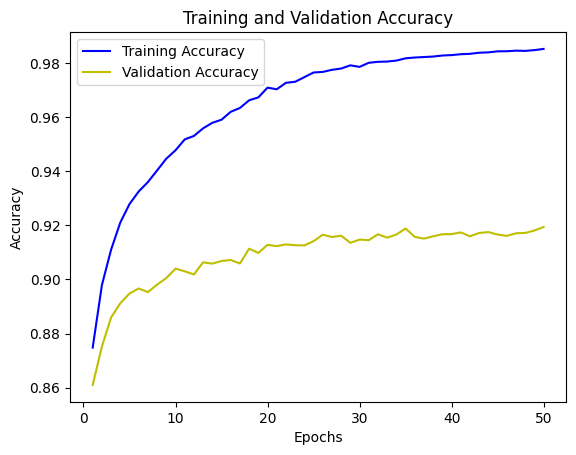

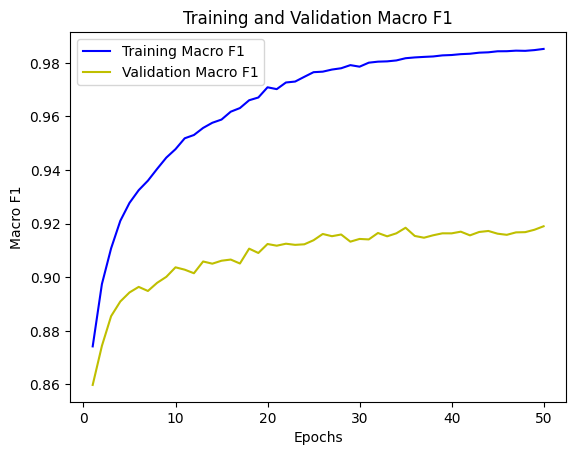

In [21]:
train_loss,val_loss,train_eval,val_eval = model3.train(loss=cross_entropy, 
                                                      loss_grad=cross_entropy_grad, 
                                                      X=X_train, y=y_train, 
                                                      epochs=50, 
                                                      batch_size=1024, 
                                                      learning_rate=5e-3,
                                                      eval_function=eval,
                                                      best_model_comparator=best_model_comparator,  
                                                      load_best_model_at_end=True,
                                                      save_best_model_at_each_epoch=True) 
plot(train_loss,val_loss,train_eval,val_eval)

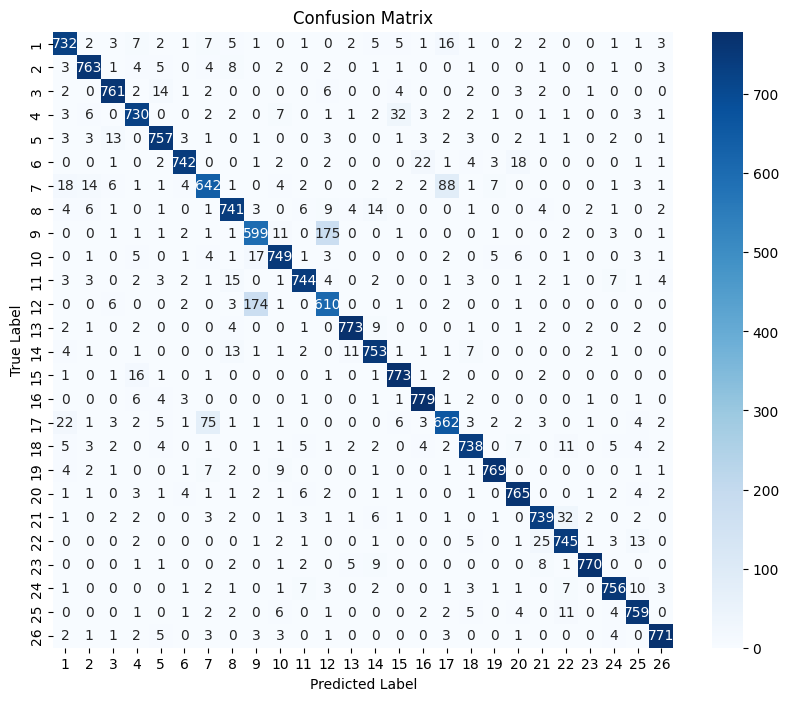

{'Accuracy': 0.9193269230769231, 'Macro_F1': 0.9193380207751188}

In [22]:
eval(model3,X_test,y_test,batch_size=4096,plot_cm=True)

In [23]:
model4 = NN(Linear(28*28,1024),ReLU(),Dropout(0.2),Linear(1024,512),ReLU(),Dropout(0.2),Linear(512,26),Softmax())
model4

Linear(784,1024)
ReLU
Dropout(20.0%)
Linear(1024,512)
ReLU
Dropout(20.0%)
Linear(512,26)
Softmax

[WinError 2] The system cannot find the file specified: 'model_Linear(784,1024)_ReLU_Dropout(20.0%)_Linear(1024,512)_ReLU_Dropout(20.0%)_Linear(512,26)_Softmax_.pkl'
epoch=0, train_loss[epoch]=0.03430214732851046, val_loss[epoch]=0.2837835393942395, train_eval[epoch]={'Accuracy': 0.8704374057315234, 'Macro_F1': 0.8701737798949642}, val_eval[epoch]={'Accuracy': 0.8544871794871794, 'Macro_F1': 0.8536720756686673}
epoch=1, train_loss[epoch]=0.019298568371856596, val_loss[epoch]=0.23849530053253004, train_eval[epoch]={'Accuracy': 0.8879807692307692, 'Macro_F1': 0.8872411844046509}, val_eval[epoch]={'Accuracy': 0.86875, 'Macro_F1': 0.8672028618077051}
epoch=2, train_loss[epoch]=0.017134395616301732, val_loss[epoch]=0.21946082953152302, train_eval[epoch]={'Accuracy': 0.9016119909502263, 'Macro_F1': 0.901753687678759}, val_eval[epoch]={'Accuracy': 0.8801282051282051, 'Macro_F1': 0.879918788958701}
epoch=3, train_loss[epoch]=0.015441386006021554, val_loss[epoch]=0.20345463636563058, train_eval

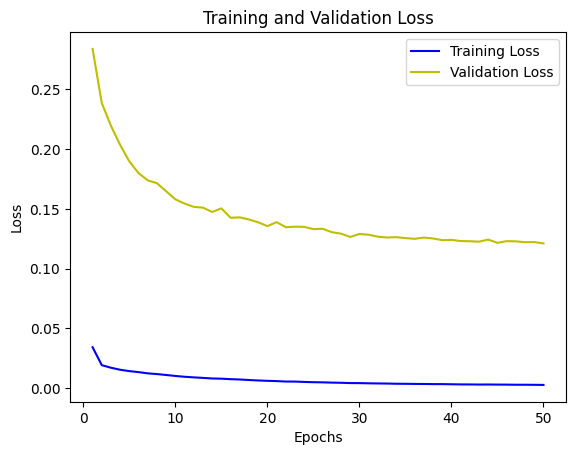

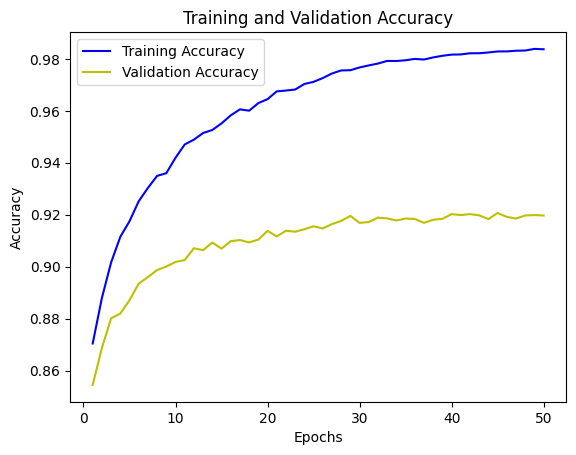

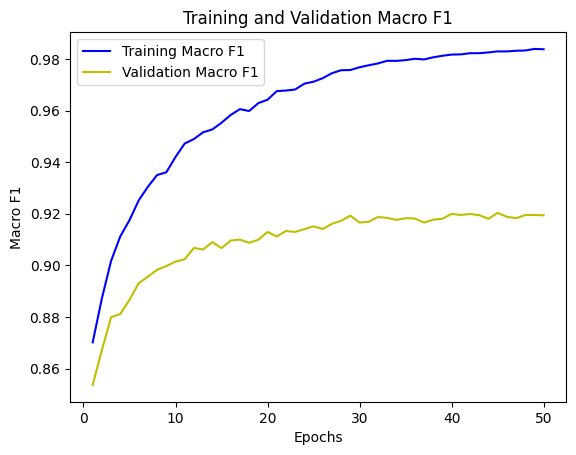

In [24]:
train_loss,val_loss,train_eval,val_eval = model4.train(loss=cross_entropy, 
                                                      loss_grad=cross_entropy_grad, 
                                                      X=X_train, y=y_train, 
                                                      epochs=50, 
                                                      batch_size=1024, 
                                                      learning_rate=5e-3,
                                                      eval_function=eval,
                                                      best_model_comparator=best_model_comparator,  
                                                      load_best_model_at_end=True,
                                                      save_best_model_at_each_epoch=True) 
plot(train_loss,val_loss,train_eval,val_eval)

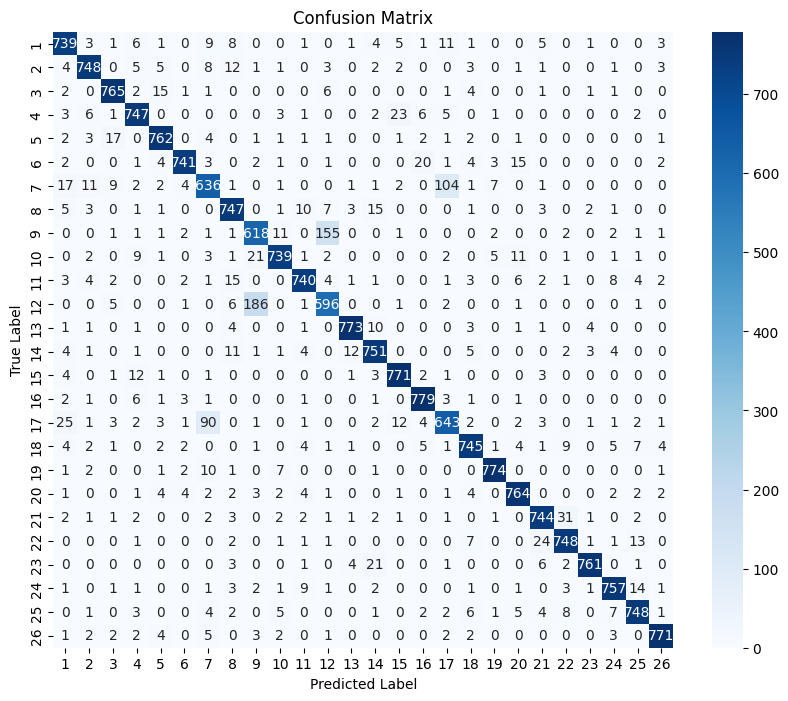

{'Accuracy': 0.9186057692307692, 'Macro_F1': 0.918629124047128}

In [25]:
eval(model4,X_test,y_test,batch_size=4096,plot_cm=True)

In [28]:
lrs = [1e-3,5e-4,1e-4]
n_epochs = 50

for learning_rate in lrs: 
    model = NN(Linear(28*28,1024),ReLU(),Dropout(0.3),Linear(1024,26),Softmax())
    model3 = NN(Linear(28*28,512),ReLU(),Dropout(.2),Linear(512,512),ReLU(),Dropout(0.1),Linear(512,26),Softmax())
    model4 = NN(Linear(28*28,1024),ReLU(),Dropout(0.2),Linear(1024,512),ReLU(),Dropout(0.2),Linear(512,26),Softmax())
    models = [model,model3,model4]
    for model in models:
        print(f"{learning_rate=}\n")
        print(f"{model=}\n")
        train_loss,val_loss,train_eval,val_eval = model4.train(loss=cross_entropy, 
                                                      loss_grad=cross_entropy_grad, 
                                                      X=X_train, y=y_train, 
                                                      epochs=n_epochs, 
                                                      batch_size=2048, 
                                                      learning_rate=learning_rate,
                                                      eval_function=eval,
                                                      best_model_comparator=best_model_comparator,  
                                                      load_best_model_at_end=True,
                                                      save_best_model_at_each_epoch=False) 
        plot(train_loss,val_loss,train_eval,val_eval)
        eval(model,X_test,y_test,batch_size=4096,plot_cm=True)
        
        

learning_rate=0.001

model=Linear(784,1024)
ReLU
Dropout(30.0%)
Linear(1024,26)
Softmax


epoch=0, train_loss[epoch]=0.041496955977551646, val_loss[epoch]=0.3464116830100561, train_eval[epoch]={'Accuracy': 0.8441930618401207, 'Macro_F1': 0.8443428586542623}, val_eval[epoch]={'Accuracy': 0.833974358974359, 'Macro_F1': 0.8338547732194228}
epoch=1, train_loss[epoch]=0.020683997219500688, val_loss[epoch]=0.26873145911736496, train_eval[epoch]={'Accuracy': 0.8873491704374057, 'Macro_F1': 0.8871626551730146}, val_eval[epoch]={'Accuracy': 0.8664529914529915, 'Macro_F1': 0.8659082396957262}
epoch=2, train_loss[epoch]=0.01619578266348876, val_loss[epoch]=0.23309181308437135, train_eval[epoch]={'Accuracy': 0.9086821266968326, 'Macro_F1': 0.9088333114594663}, val_eval[epoch]={'Accuracy': 0.8845619658119658, 'Macro_F1': 0.8843050620287681}
epoch=3, train_loss[epoch]=0.013726728287526743, val_loss[epoch]=0.2123371831242652, train_eval[epoch]={'Accuracy': 0.9217760180995475, 'Macro_F1': 0.9219891809